# Régression linéaire simple

(27, 1)
(27, 1)
(2, 1)
(27, 2)


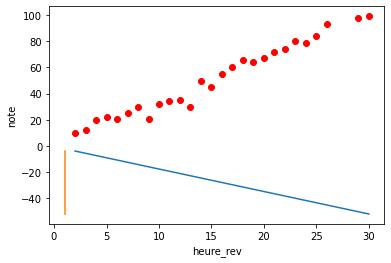

In [15]:
#importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#ouverture du fichier reg_simple.csv
regression= pd.read_csv('reg_simple.csv')
regression

#Détermination des variables du modèle
#variable explicative: heure_rev
x = regression['heure_rev']
x=np.array(x)
x=x.reshape(27,1)
#variable à expliquer: note
y = regression['note']
y=np.array(y)
y=y.reshape(27,1)

print(y.shape)
print(x.shape)
plt.scatter(x, y, c = 'red')
plt.xlabel('heure_rev')
plt.ylabel('note')



#permet d'avoir aléatoirement les coefficients a et b de la régression linéaire simple
theta=np.random.randn(2,1)
print(theta.shape)

#création d'une colonne 1
col1=np.ones((27,1),"int")

#concaténation de la colonne X et 1
X=np.hstack((x,col1))
print(X.shape)


#multiplication de la matrice X et matrice des constantes a et b, c'est à dire X.theta
#fonction model F=X.theta

def model(X,theta):
    return X.dot(theta)
    #print(np.dot(X,theta))

#model(X,theta)

#F = np.dot(X,theta)
#print(F)

#schéma de la droite du modèle entre x et F=model(X,theta)
plt.plot(X,model(X, theta))

#regression.describe()
#modele de régression simple
#fonction Y=aX+b où X=heure_rev Y=note

#X=np.array[(x)
#Y=np.array(y)

#print(X.T)







**7) Calcul de la fonction de coût**

In [2]:
# La fonction de coût permet d'evaluer la performance d'un modèle en mesurant l'erreur quadratique moyenne 
#(entre nos f(xi) et yi)

def fonction_cout(X, y, theta):
    m = len(y)
    return(1/(2*m)*(np.sum((model(X, theta)-y)**2))) 

fonction_cout(X, y, theta)


2331.0145157987035

**8) Gradient**

In [3]:

def gradient(X, y, theta):
    m=len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
gradient(X, y, theta)

array([[-1168.45788035],
       [  -60.36365813]])

**9)Descente du gradient (descente_gradient(X,y,theta,alpha,n_iterations))**

In [4]:
#elle permet de converger progressivement vers le minimum de n'importe quelle fonction convexe 
#(en suivant la direction de la pente (gradient), qui est descendante)

def descente_gradient(X, y, theta, alpha, n_iterations):
    courbe_fonct_cout = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - alpha * gradient(X, y, theta)
        #évaluation du cout à chaque itération
        courbe_fonct_cout[i]=fonction_cout(X, y, theta)
    return theta, courbe_fonct_cout    

**10) Evaluation du modèle en utilisant le coefficient de détermination**

In [9]:
theta_final, courbe_fonct_cout = descente_gradient(X, y, theta, alpha=0.001, n_iterations=200)
#alpha correspond au pas


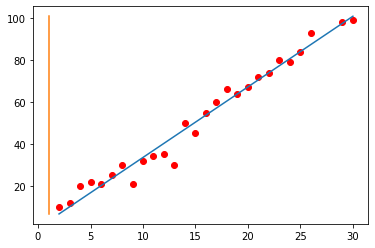

In [10]:
#prédictions
y_pred = model(X,theta_final)
y_pred
plt.plot(X, y_pred)
plt.scatter(regression['heure_rev'], regression['note'], c = 'red')




**Evaluation de la performance de la régression gràce au coefficient de détermination**

In [11]:
def coeff_determination(y,pred):
    #u est le résidu de la somme des carrés
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coeff_determination(y, y_pred)

    
    

0.9732140202510464

**Tracer la courbe de la fonction du coût selon les itérations**

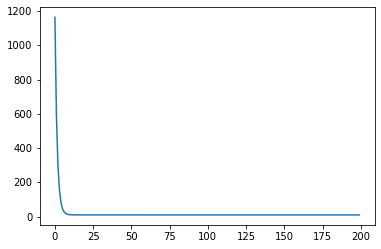

In [13]:
plt.plot(range(200), courbe_fonct_cout)

In [20]:
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print(mse)
print(mae)

19.854326690462354
3.251961438670394


# Régression linéaire Multiple

**Pour une régression linéaire multiple, il est impossible de représenter y en fonction de toutes les variables x.
On peut représenter graphiquement y en fonction d'une variable, voir deux variables x.**

In [1]:
#importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#ouverture du fichier 
datasetboston= pd.read_csv('boston_house_prices.csv')
datasetboston


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
#Détermination des variables du modèle
#variable explicative: 
xm = datasetboston.iloc[:, :-1].values
ym = datasetboston.iloc[:, 13].values
xm=np.array(xm)
xm=xm.reshape(506,13)
#variable à expliquer: MEDV
#y = datasetboston['MEDV']
ym=np.array(ym)
#ym=ym.reshape(506,1)
ym=ym.reshape(ym.shape[0], 1)
print(ym.shape)
print(xm.shape)





(506, 1)
(506, 13)


In [3]:
#création d'une colonne 1
#col1=np.ones((xm.shape[0], 1,), "int")
#print(col1)

#concaténation de la colonne X et 1
Xm=np.hstack((xm, np.ones((xm.shape[0], 1))))
print(Xm.shape)
print(Xm)


#permet d'avoir aléatoirement les coefficients a et b de la régression linéaire simple
theta=np.random.randn(14,1)
#print(theta.shape)
#print(theta)



(506, 14)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 1.0000e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 1.0000e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 1.0000e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 1.0000e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 1.0000e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.0000e+00]]


In [4]:

#multiplication de la matrice X et matrice des constantes a et b, c'est à dire X.theta
#fonction model F=X.theta

def model(Xm,theta):
    return Xm.dot(theta)
    #print(np.dot(X,theta))

model(Xm,theta)

#F = np.dot(X,theta)
#print(F)



array([[201.29402512],
       [181.29132708],
       [185.56548305],
       [198.64945744],
       [197.10738155],
       [191.55985872],
       [210.38994374],
       [198.4371925 ],
       [205.59200028],
       [197.32133049],
       [199.37167594],
       [199.56071482],
       [233.58892938],
       [199.11299094],
       [175.8687755 ],
       [202.82710418],
       [216.57405397],
       [188.34381558],
       [165.80406554],
       [194.93985174],
       [180.20001022],
       [184.6546569 ],
       [192.82122646],
       [186.44480393],
       [185.21298262],
       [142.95344026],
       [176.2473325 ],
       [143.67777458],
       [176.67847954],
       [177.18049273],
       [176.51737792],
       [167.20632148],
       [125.26111624],
       [169.02818711],
       [111.82861675],
       [197.04373747],
       [194.37736733],
       [215.77491862],
       [224.76016974],
       [297.06410764],
       [298.42383895],
       [228.57356728],
       [225.7653685 ],
       [234

**Calcul de la fonction de coût**

In [5]:
def fonction_cout(Xm, ym, theta):
    m = len(ym)
    return(1/(2*m)*(np.sum((model(Xm, theta)-ym)**2))) 

fonction_cout(Xm, ym, theta)


17529.463456086774

**Gradient**

In [6]:
def gradient(Xm, ym, theta):
    m=len(ym)
    return 1/m * Xm.T.dot(model(Xm, theta) - ym)
gradient(Xm, ym, theta)

array([[6.06444490e+02],
       [2.73484331e+03],
       [1.85359562e+03],
       [1.16165927e+01],
       [9.65995406e+01],
       [1.12594085e+03],
       [1.14819197e+04],
       [7.36984053e+02],
       [1.62674816e+03],
       [7.12451718e+04],
       [3.29493323e+03],
       [6.76982688e+04],
       [2.18044236e+03],
       [1.79046131e+02]])

**Descente du gradient (descente_gradient(X,y,theta,alpha,n_iterations))**

In [7]:
def descente_gradient(Xm, ym, theta, alpha, n_iterations):
    courbe_fonct_cout = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - alpha * gradient(Xm, ym, theta)
        #évaluation du cout à chaque itération
        courbe_fonct_cout[i]=fonction_cout(Xm, ym, theta)
    return theta, courbe_fonct_cout    

**Evaluation du modèle en utilisant le coefficient de détermination**

In [8]:
theta_final, courbe_fonct_cout = descente_gradient(Xm, ym, theta, alpha=0.0000063, n_iterations=700000)
#alpha correspond au pas

#prédictions
ym_pred = model(Xm,theta_final)
ym_pred


array([[29.21346988],
       [24.59427754],
       [31.1802132 ],
       [29.81250616],
       [29.59871319],
       [25.54502098],
       [21.58172328],
       [19.07446027],
       [10.90072139],
       [18.32533864],
       [19.2246062 ],
       [20.56667007],
       [19.50667164],
       [21.17322672],
       [21.00998845],
       [20.61020374],
       [21.91623466],
       [18.72224068],
       [16.02349935],
       [19.26658889],
       [13.6785405 ],
       [19.24321183],
       [18.118042  ],
       [15.59700074],
       [17.58425465],
       [14.18701572],
       [17.11056736],
       [16.40642188],
       [22.22576505],
       [23.67423776],
       [13.15323337],
       [19.73326376],
       [10.43173211],
       [15.35994426],
       [14.9473909 ],
       [22.75724078],
       [21.15784921],
       [22.24235032],
       [22.3337555 ],
       [31.3976114 ],
       [34.88442848],
       [28.04761074],
       [24.17166851],
       [23.85357634],
       [21.94795902],
       [20

**Evaluation de la performance de la régression gràce au coefficient de détermination**

In [11]:
def coeff_determination(ym,pred):
    #u est le résidu de la somme des carrés
    u = ((ym - pred)**2).sum()
    v = ((ym - ym.mean())**2).sum()
    return 1 - u/v

coeff_determination(ym, ym_pred)


0.7101638784027438

**Détermination du MSE et MAE**

In [12]:
mse = mean_squared_error(ym, ym_pred)
mae = mean_absolute_error(ym, ym_pred)
print(mse)
print(mae)

24.4678367432648
3.310316287824993


# Régression Polynomiale

**fichier Position_Salaire.csv**

In [53]:
#Importation des bibliothèques

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Gouverneur,6,150000
6,Associate,7,200000
7,Commercial,8,300000
8,C-level,9,500000
9,PDG,10,1000000


In [54]:
#Détermination des variables du modèle
#variable explicative: level

x = dataset.iloc[:, 1].values
x=np.array(x)
x = x.reshape(10,1)
#variable à expliquer: Salary
y = dataset.iloc[:, -1].values
y=np.array(y)
y = y.reshape(10,1)
print(x.shape)
print(y.shape)

#création d'une colonne 1
col1=np.ones((10,1),"int")

#concaténation de la colonne X et 1
X=np.hstack((x,col1))
X=np.hstack((x**2, X))
print(X.shape)
print(X)





(10, 1)
(10, 1)
(10, 3)
[[  1   1   1]
 [  4   2   1]
 [  9   3   1]
 [ 16   4   1]
 [ 25   5   1]
 [ 36   6   1]
 [ 49   7   1]
 [ 64   8   1]
 [ 81   9   1]
 [100  10   1]]


In [55]:
#permet d'avoir aléatoirement les coefficients a et b de la régression linéaire simple
theta=np.random.randn(3,1)
print(theta.shape)
print(theta)


(3, 1)
[[-0.24321132]
 [-0.58051721]
 [-0.9996677 ]]


In [56]:



#multiplication de la matrice X et matrice des constantes a et b, c'est à dire X.theta
#fonction model F=X.theta

def model(X,theta):
    return X.dot(theta)
    #print(np.dot(X,theta))

model(X,theta)

#F = np.dot(X,theta)
#print(F)

#schéma de la droite du modèle entre x et F=model(X,theta)
#plt.plot(X,model(X, theta))








array([[ -1.82339622],
       [ -3.13354738],
       [ -4.93012117],
       [ -7.21311759],
       [ -9.98253665],
       [-13.23837833],
       [-16.98064265],
       [-21.2093296 ],
       [-25.92443918],
       [-31.1259714 ]])

**Calcul de la fonction de coût**

In [57]:
def fonction_cout(X, y, theta):
    m = len(y)
    return(1/(2*m)*(np.sum((model(X, theta)-y)**2))) 

fonction_cout(X, y, theta)


71462054391.27892

**Gradient**

In [58]:
def gradient(X, y, theta):
    m=len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
gradient(X, y, theta)

array([[-17972330.22088918],
       [ -2039601.41950801],
       [  -249513.55614802]])

**Descente du gradient (descente_gradient(X,y,theta,alpha,n_iterations))**

In [59]:
def descente_gradient(X, y, theta, alpha, n_iterations):
    courbe_fonct_cout = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - alpha * gradient(X, y, theta)
        #évaluation du cout à chaque itération
        courbe_fonct_cout[i]=fonction_cout(X, y, theta)
    return theta, courbe_fonct_cout    

**Evaluation du modèle en utilisant le coefficient de détermination**

In [60]:
theta_final, courbe_fonct_cout = descente_gradient(X, y, theta, alpha=0.00001, n_iterations=200)
#alpha correspond au pas


In [61]:
#prédictions
y_pred = model(X,theta_final)
y_pred
#plt.plot(X, y_pred)
#plt.scatter(dataset['Level'], dataset['Salary'], c = 'red')


array([[  7648.9784284 ],
       [ 29192.49873282],
       [ 64687.25736939],
       [114133.25433812],
       [177530.489639  ],
       [254878.96327202],
       [346178.6752372 ],
       [451429.62553454],
       [570631.81416402],
       [703785.24112565]])

**Evaluation de la performance de la régression gràce au coefficient de détermination**

In [62]:
def coeff_determination(y,pred):
    #u est le résidu de la somme des carrés
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coeff_determination(y, y_pred)


0.8070891433683007

**fichier qualite_vin_rouge.csv**

In [63]:
#importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#ouverture du fichier 
dataset= pd.read_csv('qualite-vin-rouge.csv')
dataset.corr()




,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
acidité fixe,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
acidité volatile,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
acide citrique,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
sucre résiduel,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorures,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
dioxyde de soufre libre,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
anhydride sulfureux total,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
densité,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**On veut expliquer la qualité du vin en fonction de la variable la plus significative. 
Or, la variable la plus corrélée avec la qualité du vin est le taux d'alcool qui a un coefficient de corrélation
le plus élevé soit 0.476.** 

(1599, 1)
(1599, 1)


Text(0, 0.5, 'qualité')

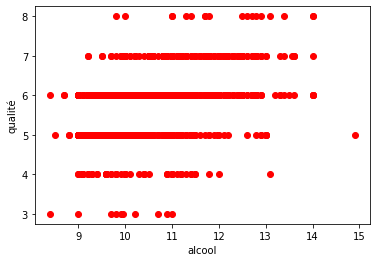

In [64]:

#Détermination des variables du modèle
#variable explicative: alcool
x = dataset['alcool']
x=np.array(x)
x=x.reshape(1599,1)
#variable à expliquer: qualité
y = dataset['qualité']
y=np.array(y)
y=y.reshape(1599,1)

print(y.shape)
print(x.shape)
plt.scatter(x, y, c = 'red')
plt.xlabel('alcool')
plt.ylabel('qualité')


In [65]:
#création d'une colonne 1
col1=np.ones((1599,1),"int")

#concaténation de la colonne X et 1
X=np.hstack((x,col1))
X=np.hstack((x**2, X))
print(X.shape)
print(X)




(1599, 3)
[[ 88.36   9.4    1.  ]
 [ 96.04   9.8    1.  ]
 [ 96.04   9.8    1.  ]
 ...
 [121.    11.     1.  ]
 [104.04  10.2    1.  ]
 [121.    11.     1.  ]]


In [66]:
#permet d'avoir aléatoirement les coefficients a et b de la régression linéaire simple
theta=np.random.randn(3,1)
print(theta.shape)
print(theta)


(3, 1)
[[ 0.26345408]
 [-0.25044595]
 [-1.33696257]]


In [67]:
#multiplication de la matrice X et matrice des constantes a et b, c'est à dire X.theta


def model(X,theta):
    return X.dot(theta)
    #print(np.dot(X,theta))

model(X,theta)


array([[19.58764768],
       [21.51079661],
       [21.51079661],
       ...,
       [27.78607522],
       [23.51825084],
       [27.78607522]])

**Fonction de coût**

In [68]:
def fonction_cout(X, y, theta):
    m = len(y)
    return(1/(2*m)*(np.sum((model(X, theta)-y)**2))) 

fonction_cout(X, y, theta)


202.1728621148709

**Gradient**

In [69]:
def gradient(X, y, theta):
    m=len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
gradient(X, y, theta)

array([[2249.7201775 ],
       [ 207.36139123],
       [  19.3369008 ]])

**Descente de gradient**

In [70]:
def descente_gradient(X, y, theta, alpha, n_iterations):
    courbe_fonct_cout = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - alpha * gradient(X, y, theta)
        #évaluation du cout à chaque itération
        courbe_fonct_cout[i]=fonction_cout(X, y, theta)
    return theta, courbe_fonct_cout    

**Evaluation du modèle en utilisant le coefficient de détermination**

In [81]:
theta_final, courbe_fonct_cout = descente_gradient(X, y, theta, alpha=0.0001, n_iterations=200)
#alpha correspond au pas

#prédictions
y_pred = model(X,theta_final)
y_pred
#plt.plot(X, y_pred)
#plt.scatter(dataset['alcool'], dataset['qualité'], c = 'red')



array([[3.81610957],
       [4.36244381],
       [4.36244381],
       ...,
       [6.16172033],
       [4.93549035],
       [6.16172033]])

In [80]:
def coeff_determination(y,pred):
    #u est le résidu de la somme des carrés
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coeff_determination(y, y_pred)


-2.6133624960817534

**Le coefficient de détermination est abérrant. IL y un problème dans la modélisation.***

**Régression multiple qualité vin**

In [19]:
#importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#ouverture du fichier 
dataset= pd.read_csv('qualite-vin-rouge.csv')
dataset.corr()


,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
acidité fixe,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
acidité volatile,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
acide citrique,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
sucre résiduel,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorures,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
dioxyde de soufre libre,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
anhydride sulfureux total,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
densité,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [22]:
#Détermination des variables du modèle
#variable explicative: alcool
x = xm = dataset.iloc[:, :-1].values
x=np.array(x)
x=x.reshape(1599,11)
#variable à expliquer: 
y = dataset['qualité']
y=np.array(y)
y=y.reshape(1599,1)

print(y.shape)
print(x.shape)
#plt.scatter(x, y, c = 'red')
#plt.xlabel('alcool')
#plt.ylabel('qualité')


(1599, 1)
(1599, 11)


In [23]:
#création d'une colonne 1
#col1=np.ones((xm.shape[0], 1,), "int")
#print(col1)

#concaténation de la colonne X et 1
X=np.hstack((x, np.ones((x.shape[0], 1))))
print(X.shape)
print(X)


#permet d'avoir aléatoirement les coefficients a et b de la régression linéaire simple
theta=np.random.randn(12,1)
#print(theta.shape)
#print(theta)


(1599, 12)
[[ 7.4    0.7    0.    ...  0.56   9.4    1.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    1.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    1.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     1.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    1.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     1.   ]]


In [24]:
#multiplication de la matrice X et matrice des constantes a et b, c'est à dire X.theta


def model(X,theta):
    return X.dot(theta)
    #print(np.dot(X,theta))

model(X,theta)


array([[19.06062691],
       [48.85164265],
       [34.28347315],
       ...,
       [35.77125963],
       [40.50082581],
       [31.97473634]])

In [25]:
def fonction_cout(X, y, theta):
    m = len(y)
    return(1/(2*m)*(np.sum((model(X, theta)-y)**2))) 

fonction_cout(X, y, theta)


660.9412341773705

In [26]:
def gradient(X, y, theta):
    m=len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
gradient(X, y, theta)

array([[ 188.81857777],
       [  13.01772149],
       [   6.25939224],
       [  69.25712933],
       [   2.13850604],
       [ 604.98092907],
       [1993.53538002],
       [  23.83827975],
       [  79.27221484],
       [  15.87381842],
       [ 243.70974909],
       [  23.91559581]])

In [33]:
theta_final, courbe_fonct_cout = descente_gradient(X, y, theta, alpha=0.00053, n_iterations=87564)
#alpha correspond au pas

#prédictions
y_pred = model(X,theta_final)
y_pred
#plt.plot(X, y_pred)
#plt.scatter(dataset['alcool'], dataset['qualité'], c = 'red')


array([[5.15203942],
       [4.91378373],
       [5.09022773],
       ...,
       [5.89320124],
       [5.48149325],
       [5.94150784]])

In [34]:
def coeff_determination(y,pred):
    #u est le résidu de la somme des carrés
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coeff_determination(y, y_pred)


0.33742935973471333